In [16]:
%matplotlib inline

In [17]:
from pathlib import Path
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
import mmap

In [40]:
TRAIN_DIR = Path('../data/raw/train_images')

In [41]:
train_imgs = list(TRAIN_DIR.glob('*.png'))
len(train_imgs)

3662

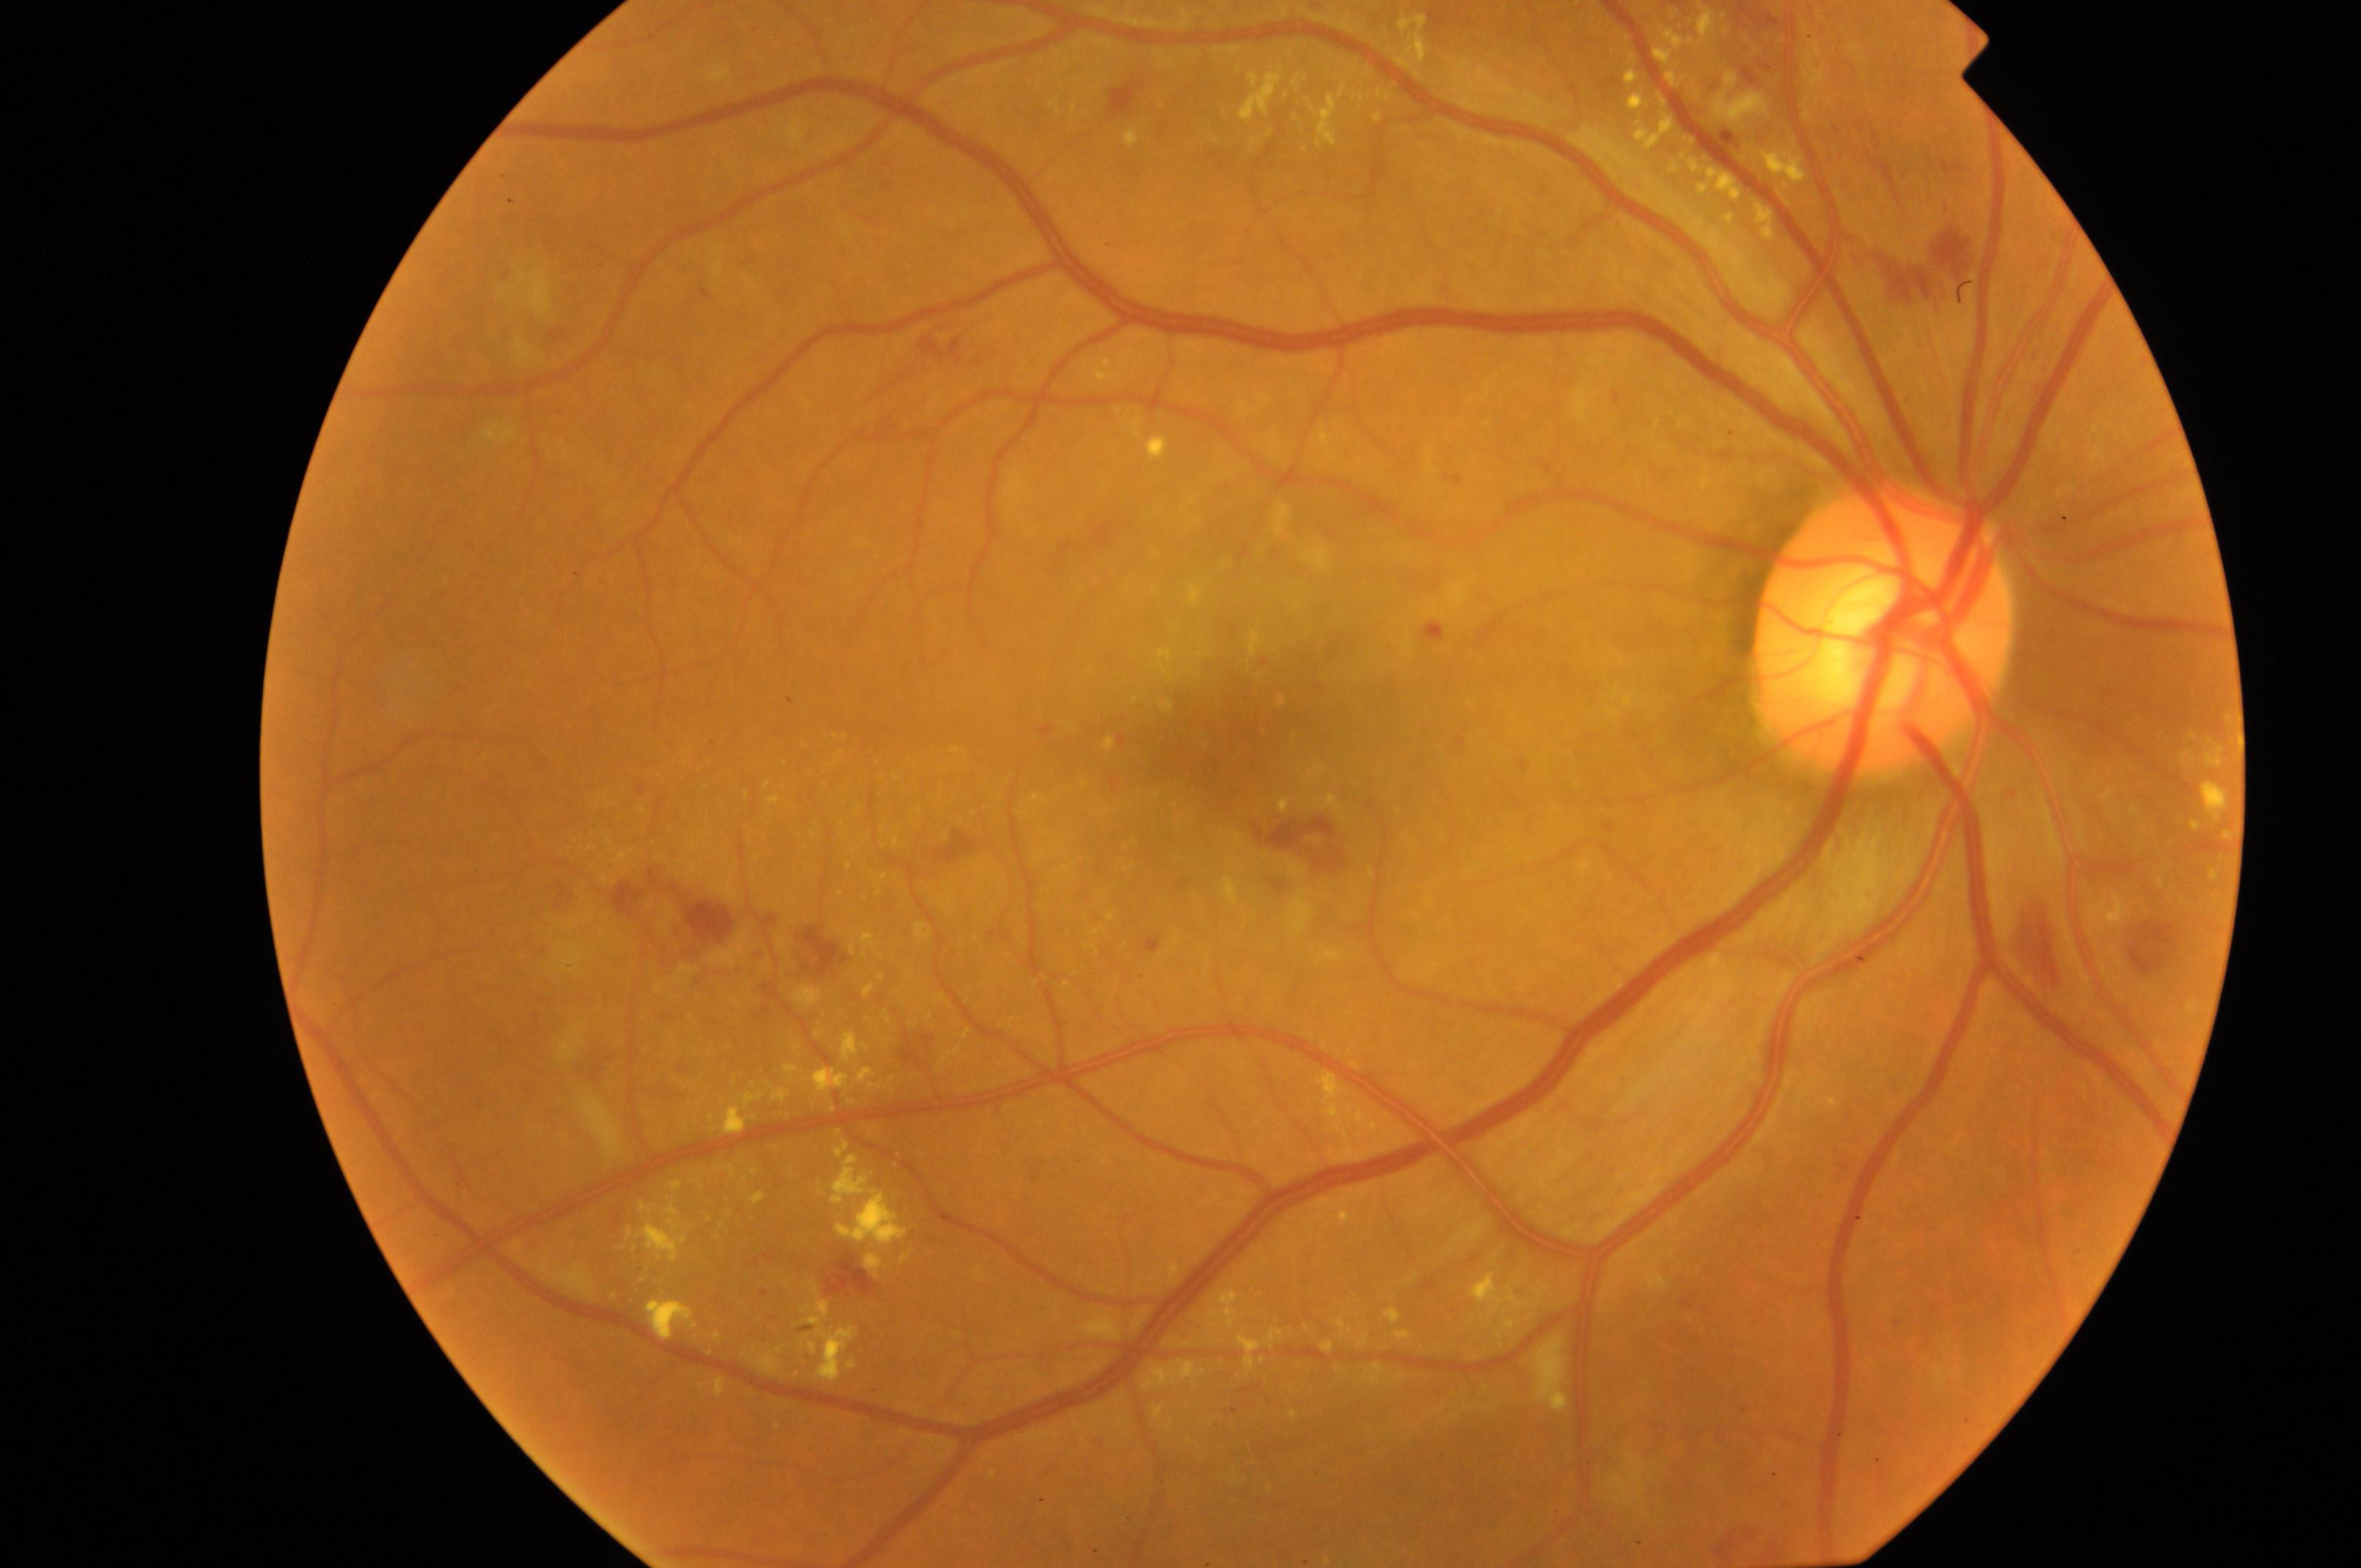

In [42]:
img = Image.open(train_imgs[8])
img

In [18]:
labels_df = pd.read_csv('../data/raw/train.csv')
labels_df.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [22]:
labels_df.dtypes

id_code      object
diagnosis     int64
dtype: object

In [30]:
labels_df.iloc[[4, 5, 6]].loc[labels_df['diagnosis'] == 0, :].index.values

array([4, 6])

In [7]:
grp_df = labels_df.groupby('diagnosis').count()
grp_df

id_code
diagnosis         
0             1805
1              370
2              999
3              193
4              295

In [8]:
n = labels_df.shape[0]

In [33]:
grp_df['weight'] = grp_df['id_code'].apply(lambda x: x/n)
grp_df

id_code    weight
diagnosis                   
0             1805  0.492900
1              370  0.101038
2              999  0.272802
3              193  0.052703
4              295  0.080557

In [34]:
grp_df.weight.sum()

1.0

In [36]:
(grp_df.weight + [0.2, 0.2, 0.2, 0.2, 0.2]) / 2

diagnosis
0    0.346450
1    0.150519
2    0.236401
3    0.126352
4    0.140279
Name: weight, dtype: float64

In [39]:
pd.unique(labels_df['diagnosis']).shape[0]

5

In [10]:
labels_df.join(grp_df[['weight']], on='diagnosis')

id_code  diagnosis    weight
0     000c1434d8d7          2  1.914593
1     001639a390f0          4  3.523288
2     0024cdab0c1e          1  3.145997
3     002c21358ce6          0  1.424363
4     005b95c28852          0  1.424363
5     0083ee8054ee          4  3.523288
6     0097f532ac9f          0  1.424363
7     00a8624548a9          2  1.914593
8     00b74780d31d          2  1.914593
9     00cb6555d108          1  3.145997
10    00cc2b75cddd          0  1.424363
11    00e4ddff966a          2  1.914593
12    00f6c1be5a33          0  1.424363
13    0104b032c141          3  4.355926
14    0124dffecf29          1  3.145997
15    0125fbd2e791          0  1.424363
16    012a242ac6ff          2  1.914593
17    014508ccb9cb          0  1.424363
18    0151781fe50b          0  1.424363
19    0161338f53cc          2  1.914593
20    0180bfa26c0b          2  1.914593
21    0182152c50de          0  1.424363
22    01b3aed3ed4c          1  3.145997
23    01c7808d901d          2  1.914593
24    01d9477b1171          0  1.424363
25    01eb826f6467          2  1.914593
26    01f7bb8be950          0  1.424363
27    0212dd31f623          0  1.424363
28    022f820027b8          0  1.424363
29    0231642cf1c2          0  1.424363
...            ...        ...       ...
3632  fe06dad6851c          0  1.424363
3633  fe0e2dee1834          0  1.424363
3634  fe0fc67c7980          3  4.355926
3635  fe2df69676cf          1  3.145997
3636  fe37f4492920          2  1.914593
3637  fe3b0e50be78          0  1.424363
3638  fe3f62695b2d          0  1.424363
3639  fe674c2f73f5          1  3.145997
3640  fea14b3d44b0          1  3.145997
3641  febfb20dc311          0  1.424363
3642  fecf4c5ae84b          1  3.145997
3643  fed5bb685832          0  1.424363
3644  fefded6bf135          0  1.424363
3645  ff03f74667df          0  1.424363
3646  ff0740cb484a          2  1.914593
3647  ff1e940105f9          0  1.424363
3648  ff344e5c9341          2  1.914593
3649  ff4832d55461          0  1.424363
3650  ff4955e76894          0  1.424363
3651  ff4cd992667b          0  1.424363
3652  ff52392372d3          2  1.914593
3653  ff59d44a70a7          0  1.424363
3654  ff631653374e          0  1.424363
3655  ff77e8e5b5f3          2  1.914593
3656  ff8a0b45c789          4  3.523288
3657  ffa47f6a7bf4          2  1.914593
3658  ffc04fed30e6          0  1.424363
3659  ffcf7b45f213          2  1.914593
3660  ffd97f8cd5aa          0  1.424363
3661  ffec9a18a3ce          2  1.914593

[3662 rows x 3 columns]

In [ ]:
labels_df.iloc[3]['diagnosis']

In [ ]:
import torchvision.transforms as T
from aptos.data_loader import PngDataset

In [ ]:
transforms = T.ToTensor()

In [ ]:
ds = PngDataset('../data/raw', transforms)

In [ ]:
ds[3][0][0].mean()

In [ ]:
n = len(ds)
means = np.zeros((n, 3))
stds  = np.zeros((n, 3))
shapes = []
for idx, (t, label) in tqdm(enumerate(ds), total=n):
#     for c in range(3):
#         means[idx, c] = t[c].mean().item()
#         stds[idx, c]  = t[c].std().item()
    shapes.append(t.size())

In [ ]:
print(means[0].mean())
print(means[1].mean())
print(means[2].mean())

In [ ]:
print(stds[0].mean())
print(stds[1].mean())
print(stds[2].mean())

In [ ]:
a = np.asarray(shapes)
print(a[0].mean(), a[1].mean())

In [ ]:
a.shape

In [ ]:
print(a[1].min(), a[1].max())
print(a[2].min(), a[2].max())

In [ ]:
a = np.zeros((n, 2))

In [ ]:
for idx, s in enumerate(shapes):
    a[idx, :] = s[1:]

In [ ]:
print(a[:, 0].min())
print(a[:, 0].max())

In [ ]:
print(a[:, 1].min())
print(a[:, 1].max())

In [ ]:
shapes[:10]

In [12]:
submission_df = pd.read_csv('../submission.csv')
submission_df.head(2)

id_code  avg
0  0005cfc8afb6    2
1  003f0afdcd15    2

In [14]:
submission_df.groupby('avg').count()

id_code
avg         
0        224
1        413
2        962
3        249
4         80

In [51]:
total = [3.922591,  3.631582,  3.788754,  3.528927,  3.675499,  
         4.000000,  3.304373,  3.562177,  4.000000,  4.000000]
total

[3.922591,
 3.631582,
 3.788754,
 3.528927,
 3.675499,
 4.0,
 3.304373,
 3.562177,
 4.0,
 4.0]

In [55]:
np.round(np.mean(total))

4.0